# Отчет по лабораторной работе №4. Поиск минимума функции нескольких переменных. Выполнил Сарафанов Ф.Г., 430 гр, 19 вариант

Импорт библиотек

In [1]:
%matplotlib inline
# import matplotlib
import numpy as np
from numpy import pi,cos,sin,abs,sqrt,exp
import matplotlib.pyplot as plt

phi = 0.5 * (1.0 + sqrt(5.0))

## Постановка задачи
Рассмотрим задачу нахождения безусловного минимума функции $f({x})$, заданной на всем пространстве $R^2$: 

$$f({x})\to \textrm{min},{X}\in R^2$$

Для численного решения задачи обычно строят некоторую последовательность векторов $\{{x}^k\}|_{k=0}^\infty$, обрывая процесс построения тогда, когда появляется уверенность, что последний из построенных элементов последовательности близок к точке минимума. В этой работе в качестве условия остановки используется условие:

$$||{x}^k-{x}^{k-1}||<\varepsilon$$

Большинство процессов, используемых для приближенного поиска минимума можно представить как итерационные в виде 

$${x}^{k+1}={x}^k+\alpha_k \vec{p}^k,$$

где ${p}^k$ - вектор, определяющий направление движения от точки ${x}^{k}$ к точке ${x}^{k+1}$, $\alpha_{k}$ - числовой множитель, величина которого задает длину шага в направлении ${p}^k$.

Простейшими методами первого порядка являются одношаговые методы спуска, в которых на каждом шаге ${p}_k$ совпадает с направлением антиградиента функции:

$$f(x):p^k=−\nabla f(x^k)$$

Зададим функцию, начальную точку $x^0$ и аналитически рассчитанные проекции градиента:

In [2]:
def f(x,y):
    return cos(x)*sin(y)#-x-y**2+y*sqrt(x-9)+18*y-6*sqrt(x-9)-63

def gradx(x,y):
    return -sin(x)*sin(y)#(-2*(3 + sqrt(-9 + x)) + y)/(2*sqrt(-9 + x))

def grady(x,y):
    return cos(x)*cos(y)#18 + sqrt(-9 + x) - 2*y

#начальная точка
# x,y=-6,1.57
# x,y=-6,-1
x,y=-4.9,0.41

Функция из задания (и её градиент) комплекснозначна на многих значениях и не годится для исследования. Была взята функция, имеющая наглядный профиль максимумов/минимумов. 

Для поиска минимума используется метод наискорейшего спуска:


## Метод наискорейшего спуска

В методе наискорейшего спуска $\alpha_{k}$ выбирается из условия минимума функции $f(x)$ вдоль направления антиградиента:

$$f(x_k+\alpha_kp^k)=\min\limits_{\alpha>0} f(x_k+\alpha p^k)$$

Таким образом, в методе наискорейшего спуска на каждом шаге необходимо решать задачу минимизации функции одной переменной 

$$F^k(\alpha)=f(x_k+\alpha p^k)$$

Найденное значение будет множителем для шага $k\to k+1$.

### Задача минимизации функции одной переменной

Функция $F^k(\alpha)$ может иметь много минимумов. Кроме того, для применения численных методов поиска минимума необходимо задать интервал, на котором будет производится поиск. 

В качестве такого интервала будет искаться первый интервал унимодальности методом скользущего окна.

После определения унимодального отрезка уточнение минимума производится методом золотого сечения.

#### Метод скользущего окна

Для выбранной исходной точки $\alpha_0=0$ и выбранного окна шириной $2h >0$ около точки $\alpha_0$ проверяется условие унимодальности 

$$F(\alpha_0−h)> F(\alpha_0)< F(\alpha_0+h).$$

Если условие выполнено, то считается, что интервал унимодальности найден, в противном случае проверяется условие 

$$F(\alpha_0−h)> F(\alpha_0+h).$$

Если последнее выполнено, тогда окно сдвигается вправо от точки $\alpha_0$ на $\frac{h}{2}$,в противном случае аналогично влево. Выбор ширины окна определяется экспериментально - в данном случае ширина окна задана как $h=0.05$.

Так как минимум ищется в области больше нуля, то в качестве начальной точки выбрана $\alpha_0$=0.

In [3]:
h=0.05
def scw(F,h):
    alpha0=0
    while not((F(alpha0-h)>F(alpha0))&(F(alpha0)<F(alpha0+h))):
        if F(alpha0-h)>F(alpha0+h):
            alpha0=alpha0+h/2
        else:
            alpha0=alpha0-h/2
    return alpha0

#### Метод золотого сечения
Пусть задана  $f(x):\;[a,\;b]\to\mathbb{R},\;f(x)\in\mathrm{C}([a,\;b])$. Тогда для того, чтобы найти неопределённое значение этой функции на заданном отрезке, отвечающее критерию поиска (пусть это будет минимум), рассматриваемый отрезок делится в пропорции золотого сечения в обоих направлениях, то есть выбираются две точки $x_1$ и $x_2$ такие, что: 

$$\frac{b-a}{b-x_1}=\frac{b-a}{x_2-a}=\Phi=\frac{1+\sqrt{5}}{2}=1.618\ldots,$$ 

где $\Phi$ — пропорция золотого сечения.  Введем обозначение $t=\frac{(b-a)}{\Phi}$, тогда 

$$\begin{array}{ccc}
x_1=b-t\\
x_2=a+t
\end{array}$$

Точка $x_1$ делит отрезок $[a,\;x_2]$ в отношении золотого сечения. Аналогично $x_2$ делит отрезок $[x_1,\;b]$ в той же пропорции. Это свойство и используется для построения итеративного процесса:

##### Итерационный процесс
1. На первой итерации заданный отрезок делится двумя симметричными относительно его центра точками и рассчитываются значения в этих точках
1. После чего тот из концов отрезка, к которому среди двух вновь поставленных точек ближе оказалась та, значение в которой максимально (для случая поиска минимума), отбрасывают
1. На следующей итерации в силу показанного выше свойства золотого сечения уже надо искать всего одну новую точку
1. Процедура продолжается до тех пор, пока не будет достигнута заданная точность

In [4]:
def minimize(f,eps,a,b): 
    if abs(b - a) < eps: 
        return (a + b)/2
    else:
        t = (b - a) / phi
        x1, x2 = b - t, a + t
        if f(x1) >= f(x2):
            return minimize(f,eps,x1,b)
        else:
            return minimize(f,eps,a,x2)

Выполним построение графика функции. Для этого зададим сетку $X,Y$ в пределах $x_{min}\ldots x_{max}$,$y_{min}\ldots y_{max}$, на которой построим график и отметим начальную точку $x^0$.

График не выводим сразу, так как на нем же будем строить итерационную ломаную.

Зададим значения:

* $\varepsilon_1$ - условие остановки итерации $||x^n-x^{n-1}||<\varepsilon_1$, где $n$ - номер последней итерации
* $\varepsilon_2$ - условие остановки минимизации $|b-a|<\varepsilon_2$

$xo$,$yo$ - перезаписываемые значения предыдущей точки, для запуска цикла while.

Итераций:  5
-3.1415926535748833 1.5707963268180796


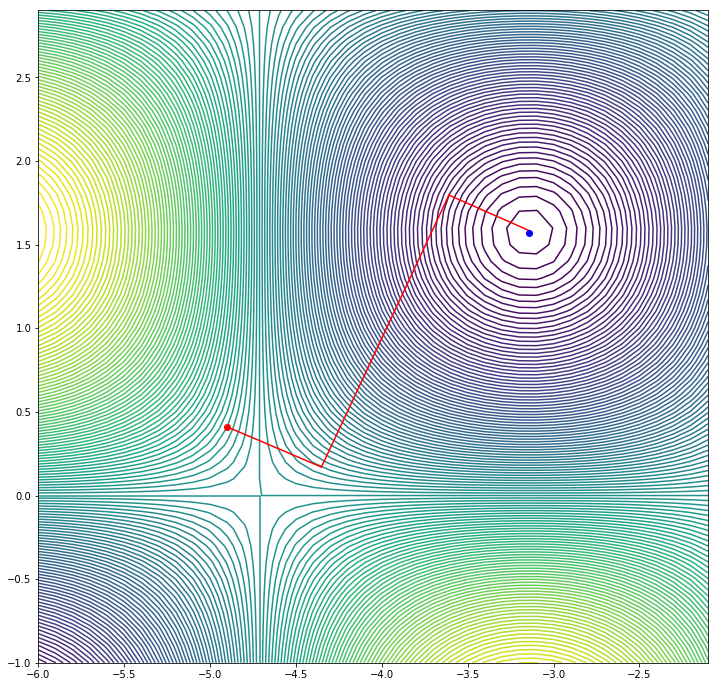

In [5]:
xmin,xmax=-6,-2
ymin,ymax=-1,3

eps1=0.0001
eps2=0.0001
xo,yo=1000,1000

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

X = np.arange(xmin,xmax, 0.10)
Y = np.arange(ymin,ymax, 0.10)
X, Y = np.meshgrid(X, Y)   
plt.contour(X,Y,f(X,Y),140)
                   
plt.plot(x,y,'ro')
                   
i=0
while sqrt((x-xo)**2+(y-yo)**2)>eps1:
    i+=1
    def F(alpha): 
        return f(x+alpha*(-gradx(x,y)),y+alpha*(-grady(x,y)))
    
    alpha=minimize(F,eps2,0,scw(F,h))
    xo,yo=x,y
    x,y=x+alpha*(-gradx(x,y)),y+alpha*(-grady(x,y))
    
    plt.plot([xo, x],[yo, y],'-r')

print('Итераций: ',i)
plt.plot([x],[y],'-bo')
print(x,y)
plt.show() 

## Оценка овражности функции в максимуме

Оценим овражность функции $f(x,y)$ в области максимума функции. Не рассчитывая численное значение максимума, ограничимся аналитическим значением максимума функции, например, в точке $(-2\pi,\pi/2)$.

 По определению, под показателем овражности $k$ функции $f(x)$ в окрестности точки  $(x',y')$ подразумевают отношение наибольшего собственного числа матрицы Гессе $\nabla^2 f(x',y')$ к наименьшему.
 
Чем больше этот показатель, тем более вытянутым и крутым является <<овраг>> поверхности уровня исследуемой функции в окрестности $(x',y')$ и тем медленнее сходятся в этой окрестности градиентные итерационные методы.

In [6]:
# Матрица Гессе (Гессиан)
def gessian(x,y):
    Arr=np.array([[-sin(y)*cos(x),-sin(x)*cos(y)],
        [-sin(x)*cos(y),-sin(y)*cos(x)]])
    return Arr 

# Точка максимума
XX=-2*pi
YY=pi/2

# Собственные значения матрицы Гессе
P=np.linalg.eig(gessian(XX,YY))[0]

# Коэфф. овражности
k=np.max(P)/np.min(P)
print('Коэффициент овражности:',k)

Коэффициент овражности: 1.0


## Метод случайного поиска

В нашем случае минимизация функции происходит на плоскости. Алгортим поиска минимума:

1. Задается начальная точка $(x, y)$;
1. Задается начальная длина шага по плоскости $d_0$;
1. С помощью генератора случайных чисел разыгрывается случайное направление $\Psi\in[0,2\pi]$ на плоскости;
1. Делается шаг $d_0$ в этом направлении и вычисляется функция в новой точке $(x+d_0\cdot\cos\Psi, y+d_0\cdot\sin\Psi)$;
1. Если значение функции возросло, то остаемся в начальной точке, шаг немного уменьшается на 1% и снова разыгрывается случайное направление и проверяется в новой точке;
1. Если значение в новой точке уменьшилось, то шаг увеличивается на 1%, и из новой точки делается шаг в том же направлении, и т.д. до тех пор пока в последней точке не будет найдено ни одного направления ведущего к уменьшению функции, при этом длина шага $d_0$ будет все время уменьшаться на 1%, пока не достигнет окрестности $\varepsilon_1$.

Итераций:  1193
-3.141570229210347 1.5708505442843754


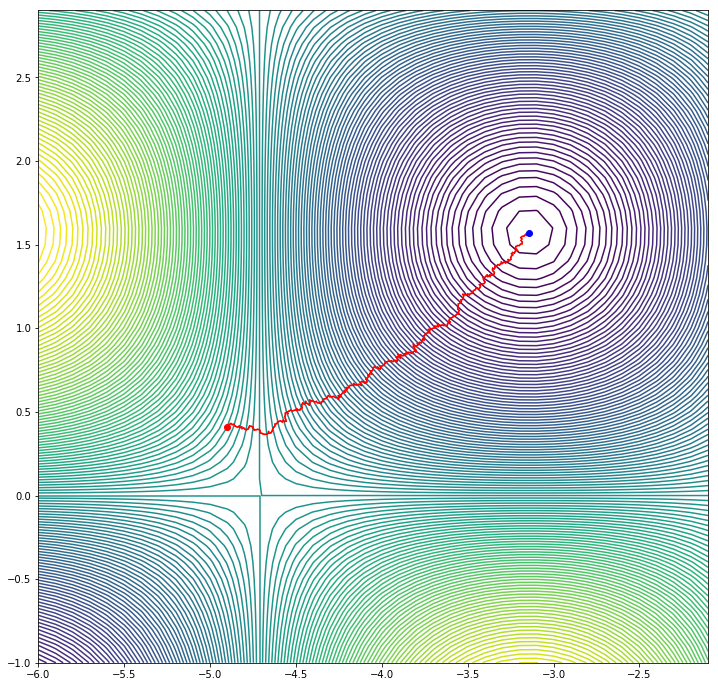

In [7]:

x,y=-4.9,0.41

xmin,xmax=-6,-2
ymin,ymax=-1,3

d=0.01
eps1=0.0001

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.contour(X,Y,f(X,Y),140)
plt.plot(x,y,'ro')
                   
i=0
while d>eps1:
    i+=1
    xo,yo=x,y
    psi=np.random.uniform(0, 2*pi)
    x=x+d*cos(psi)
    y=y+d*sin(psi)
    if f(x,y)>f(xo,yo):
        d=d-0.01*d
        x,y=xo,yo
    if f(x,y)<f(xo,yo):
        d=d+0.01*d
        plt.plot([xo, x],[yo, y],'-r')

print('Итераций: ',i)
plt.plot([x],[y],'-bo')
print(x,y)
plt.show() 